In [1]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# use the searborn style
plt.style.use("seaborn")
# make interactive plots
plt.ion()

# %matplotlib qt
%matplotlib inline

In [2]:
def logistic_map(x: float, r: float) -> float:
    """The logistic map function.

    Parameters
    ----------
    x : float
        The value x_n, i.e. at the current time step.
    r : float
        The r value of the logistic map, see also [1]_.
    
    Returns
    -------
    float
        The value x_n+1 at the next time step.

    References
    ----------
    .. [1] https://en.wikipedia.org/wiki/Logistic_map

    """

    return x * r * (1 - x)

def calculate(n: int, x: float, r: float):
    """Calculate the values of the logistic map.

    Parameters
    ----------
    n : int
        The number of time steps.
    x : float
        The value x_n, i.e. at the current time step.
    r : float
        The r value of the logistic map, see also the :meth:`logistic_map` function documentation.

    Yields
    ------
    float
        The value x_n at the next time step.
    
    """

    for i in range(0, n):
        x = logistic_map(x, r)
        yield x

In [3]:
# number of time units
n = 150
# fraction
x = 0.4
# r value
r = np.linspace(0.2, 5, 200)
mask = r >= 3.0
result = np.zeros((n, r.shape[0]), dtype=float)
for i, _r in enumerate(r):
    result[:, i] = np.array(list(calculate(n, x, _r)), dtype=float)
# store the results in a dataframe
df = pd.DataFrame(data=result, columns=[f"r={_r:.2f}" for _r in r], dtype=float)

In [4]:
df.head()

,r=0.20,r=0.22,r=0.25,r=0.27,r=0.30,r=0.32,r=0.34,r=0.37,r=0.39,r=0.42,...,r=4.78,r=4.81,r=4.83,r=4.86,r=4.88,r=4.90,r=4.93,r=4.95,r=4.98,r=5.00
0,0.048000,0.053789,0.059578,0.065367,0.071156,0.076945,0.082734,0.088523,0.094312,0.100101,...,1.147899,1.153688,1.159477,1.165266,1.171055e+00,1.176844e+00,1.182633e+00,1.188422e+00,1.194211e+00,1.2
1,0.009139,0.011407,0.013909,0.016640,0.019595,0.022771,0.026161,0.029761,0.033566,0.037571,...,-0.812013,-0.852329,-0.893331,-0.935026,-9.774173e-01,-1.020511e+00,-1.064311e+00,-1.108823e+00,-1.154051e+00,-1.2
2,0.001811,0.002527,0.003405,0.004457,0.005696,0.007134,0.008782,0.010650,0.012747,0.015082,...,-7.037481,-7.589311,-8.171279,-8.784645,-9.430713e+00,-1.011082e+01,-1.082636e+01,-1.157875e+01,-1.236946e+01,-13.2
3,0.000362,0.000565,0.000842,0.001208,0.001679,0.002271,0.003001,0.003886,0.004945,0.006195,...,-270.538936,-313.356011,-362.052026,-417.333532,-4.799817e+02,-5.508590e+02,-6.309171e+02,-7.212046e+02,-8.228758e+02,-937.2
4,0.000072,0.000127,0.000209,0.000329,0.000497,0.000726,0.001031,0.001428,0.001934,0.002568,...,-351361.776872,-473518.662843,-635025.094450,-847656.535806,-1.126469e+06,-1.490652e+06,-1.964587e+06,-2.579160e+06,-3.373384e+06,-4396405.2


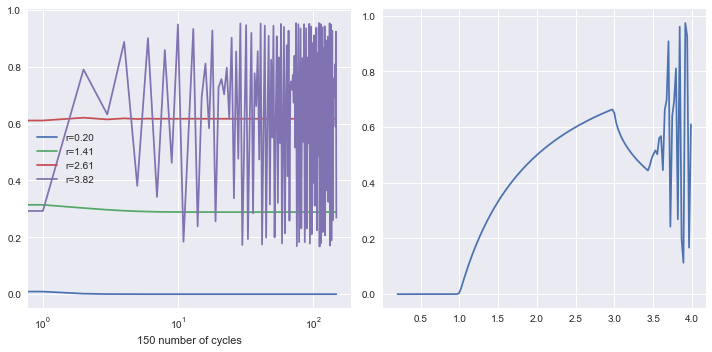

In [5]:
nrows, ncols = 1, 2
fig1 = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(nrows, ncols, figure=fig1)
ax1 = fig1.add_subplot(gs[0, 0])
ax2 = fig1.add_subplot(gs[0, 1])
for i in range(0, r.shape[0], 50):
    idx = f"r={r[i]:.2f}"
    ax1.plot(df[idx], label=idx)
ax1.legend()
ax1.set(xscale="log", xlabel=f"{n} number of cycles")

ax2.plot(r, df.tail(1).to_numpy(dtype=float).reshape((-1,)))
ax2.set(xscale="linear")

fig1.tight_layout()